In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
amazon_ratings = pd.read_csv('dataset.csv')
#amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,userID,productID,id,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,...,prices.offer,prices.shipping,prices.sourceURLs,reviews,sizes,skus,sourceURLs,upc,ratings,timestamp
0,A39HTATAQ9V7YF,AVpfHrJ6ilAPnD_xVXOI,205616461,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,5,1369699200
1,A3JM6GV9MNOF9X,AVpfHrJ6ilAPnD_xVXOI,558925278,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,3,1355443200
2,A1Z513UWSAAO0F,AVpfHsWP1cnluZ0-eVZ7,558925278,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,5,1404691200
3,A1WMRR494NWEWV,AVpfHsWP1cnluZ0-eVZ7,733001998,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,4,1382572800
4,A3IAAVS479H7M7,AVpfHsWP1cnluZ0-eVZ7,737104473,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,1,1274227200


In [4]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userID              1068 non-null   object 
 1   productID           1068 non-null   object 
 2   id                  1068 non-null   object 
 3   brand               1061 non-null   object 
 4   categories          1068 non-null   object 
 5   colors              604 non-null    object 
 6   count               0 non-null      float64
 7   dateAdded           1068 non-null   object 
 8   dateUpdated         1068 non-null   object 
 9   descriptions        573 non-null    object 
 10  dimension           150 non-null    object 
 11  ean                 596 non-null    float64
 12  features            818 non-null    object 
 13  imageURLs           1011 non-null   object 
 14  keys                1068 non-null   object 
 15  manufacturer        380 non-null    object 
 16  manufa

In [5]:
amazon_ratings['count'] = amazon_ratings['count'].apply(lambda x:np.random.randint(1, 10))

In [6]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userID              1068 non-null   object 
 1   productID           1068 non-null   object 
 2   id                  1068 non-null   object 
 3   brand               1061 non-null   object 
 4   categories          1068 non-null   object 
 5   colors              604 non-null    object 
 6   count               1068 non-null   int64  
 7   dateAdded           1068 non-null   object 
 8   dateUpdated         1068 non-null   object 
 9   descriptions        573 non-null    object 
 10  dimension           150 non-null    object 
 11  ean                 596 non-null    float64
 12  features            818 non-null    object 
 13  imageURLs           1011 non-null   object 
 14  keys                1068 non-null   object 
 15  manufacturer        380 non-null    object 
 16  manufa

In [7]:
amazon_ratings

,userID,productID,id,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,...,prices.offer,prices.shipping,prices.sourceURLs,reviews,sizes,skus,sourceURLs,upc,ratings,timestamp
0,A39HTATAQ9V7YF,AVpfHrJ6ilAPnD_xVXOI,205616461,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,3,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,5,1369699200
1,A3JM6GV9MNOF9X,AVpfHrJ6ilAPnD_xVXOI,558925278,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,8,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,3,1355443200
2,A1Z513UWSAAO0F,AVpfHsWP1cnluZ0-eVZ7,558925278,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,5,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,5,1404691200
3,A1WMRR494NWEWV,AVpfHsWP1cnluZ0-eVZ7,733001998,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,4,1382572800
4,A3IAAVS479H7M7,AVpfHsWP1cnluZ0-eVZ7,737104473,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,1,1274227200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,A3OFKO6HR06L0V,AVpfHJSGilAPnD_xVMFU,9790771010,PUMA,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",White,3,2016-11-15T13:14:59Z,2016-11-15T13:14:59Z,"[{""dateSeen"":[""2016-11-15T13:14:59Z""],""sourceU...",...,REDUCED USD 23.02,NaN,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,NaN,12,NaN,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,8.89E+11,2,1358467200
1064,A3KL8WSLJPSWMR,AVpe7cFYilAPnD_xRF9d,9790771339,Nike,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",Multi-Color,8,2016-03-04T05:43:58Z,2016-03-04T05:43:58Z,NaN,...,NaN,NaN,http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,NaN,10,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-M...",http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,8.88E+11,5,1355011200
1065,AHUQSDM26UH5C,AVpfVKLGilAPnD_xZxjH,9790771347,SKECHERS,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",NaN,5,2016-11-11T09:46:36Z,2016-11-11T09:46:36Z,"[{""dateSeen"":[""2016-11-11T09:46:36Z""],""sourceU...",...,NaN,NaN,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,NaN,NaN,NaN,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,NaN,3,1348790400
1066,ATJ6S9R0W10JS,AVpfVB2E1cnluZ0-it1Q,9790771401,Georgia Boot,"Home Improvement,Men's Work & Safety Shoes,All...",NaN,8,2016-02-25T21:08:16Z,2016-06-08T05:29:32Z,"[{""dateSeen"":[""2016-06-08T05:29:32Z""],""sourceU...",...,NaN,NaN,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,NaN,NaN,NaN,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,NaN,5,1389398400


In [8]:
amazon_ratings = amazon_ratings.fillna(0)

In [9]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userID              1068 non-null   object 
 1   productID           1068 non-null   object 
 2   id                  1068 non-null   object 
 3   brand               1068 non-null   object 
 4   categories          1068 non-null   object 
 5   colors              1068 non-null   object 
 6   count               1068 non-null   int64  
 7   dateAdded           1068 non-null   object 
 8   dateUpdated         1068 non-null   object 
 9   descriptions        1068 non-null   object 
 10  dimension           1068 non-null   object 
 11  ean                 1068 non-null   float64
 12  features            1068 non-null   object 
 13  imageURLs           1068 non-null   object 
 14  keys                1068 non-null   object 
 15  manufacturer        1068 non-null   object 
 16  manufa

In [10]:
amazon_ratings

,userID,productID,id,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,...,prices.offer,prices.shipping,prices.sourceURLs,reviews,sizes,skus,sourceURLs,upc,ratings,timestamp
0,A39HTATAQ9V7YF,AVpfHrJ6ilAPnD_xVXOI,205616461,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",0,3,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",...,REDUCED USD 12.10,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,0,0,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,5,1369699200
1,A3JM6GV9MNOF9X,AVpfHrJ6ilAPnD_xVXOI,558925278,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",0,8,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",...,REDUCED USD 12.10,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,0,0,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,3,1355443200
2,A1Z513UWSAAO0F,AVpfHsWP1cnluZ0-eVZ7,558925278,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",0,5,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,5,1404691200
3,A1WMRR494NWEWV,AVpfHsWP1cnluZ0-eVZ7,733001998,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",0,2,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,4,1382572800
4,A3IAAVS479H7M7,AVpfHsWP1cnluZ0-eVZ7,737104473,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",0,2,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",...,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,1,1274227200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,A3OFKO6HR06L0V,AVpfHJSGilAPnD_xVMFU,9790771010,PUMA,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",White,3,2016-11-15T13:14:59Z,2016-11-15T13:14:59Z,"[{""dateSeen"":[""2016-11-15T13:14:59Z""],""sourceU...",...,REDUCED USD 23.02,0,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,0,12,0,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,8.89E+11,2,1358467200
1064,A3KL8WSLJPSWMR,AVpe7cFYilAPnD_xRF9d,9790771339,Nike,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",Multi-Color,8,2016-03-04T05:43:58Z,2016-03-04T05:43:58Z,0,...,0,0,http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,0,10,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-M...",http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,8.88E+11,5,1355011200
1065,AHUQSDM26UH5C,AVpfVKLGilAPnD_xZxjH,9790771347,SKECHERS,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",0,5,2016-11-11T09:46:36Z,2016-11-11T09:46:36Z,"[{""dateSeen"":[""2016-11-11T09:46:36Z""],""sourceU...",...,0,0,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,0,0,0,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,0,3,1348790400
1066,ATJ6S9R0W10JS,AVpfVB2E1cnluZ0-it1Q,9790771401,Georgia Boot,"Home Improvement,Men's Work & Safety Shoes,All...",0,8,2016-02-25T21:08:16Z,2016-06-08T05:29:32Z,"[{""dateSeen"":[""2016-06-08T05:29:32Z""],""sourceU...",...,0,0,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,0,0,0,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,0,5,1389398400


In [11]:
amazon_ratings.shape

(1068, 37)

In [13]:
popular_products = pd.DataFrame(amazon_ratings.groupby('productID')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
productID,
AVpfCNdwLJeJML4308gO,23
AVpfN-0nLJeJML4345E3,10
AVpe99dVLJeJML43zb-2,9
AVpfHsWP1cnluZ0-eVZ7,8
AVpfF-UjLJeJML432Pg-,8
AVpfLqlA1cnluZ0-fqc6,7
AVpfE0wp1cnluZ0-dXMe,7
AVpfEY-oilAPnD_xUQDk,7
AVpe8Pi0ilAPnD_xRYTs,6


<AxesSubplot:xlabel='productID'>

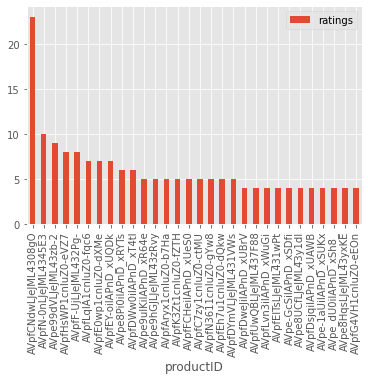

In [14]:
most_popular.head(30).plot(kind = "bar")

In [15]:
ratings_utility_matrix = amazon_ratings.pivot_table(values='ratings', index='userID', columns='productID', fill_value=0)
ratings_utility_matrix.head()

productID,AVpe--H8ilAPnD_xSXUP,AVpe-0fzLJeJML43zvf_,AVpe-1Cw1cnluZ0-bRO8,AVpe-1aUilAPnD_xSUKx,AVpe-2_RilAPnD_xSUuT,AVpe-33ELJeJML43zwtm,AVpe-3cP1cnluZ0-bSGi,AVpe-4-n1cnluZ0-bSqt,AVpe-4M2LJeJML43zw18,AVpe-9DRLJeJML43zykS,...,AVpfU0VYilAPnD_xZqkw,AVpfU78M1cnluZ0-ir-P,AVpfU9AgilAPnD_xZtSl,AVpfU_7z1cnluZ0-itQC,AVpfUhYWLJeJML437BXa,AVpfUuliilAPnD_xZowd,AVpfUwQBLJeJML437F88,AVpfVB2E1cnluZ0-it1Q,AVpfVHG3LJeJML437NNs,AVpfVKLGilAPnD_xZxjH
userID,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A05492663T95KW63BR75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10205RFE66H1R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
ratings_utility_matrix.shape

(1016, 576)

In [17]:
X = ratings_utility_matrix.T
X.head()

userID,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A05492663T95KW63BR75K,A100GYE1W4OXZ8,A10205RFE66H1R,A104D62WJII6KP,A108HJD2ESJXUY,A10GKM76NOQLGE,A10R4813UIW6GH,A10REFE1TW3ZVT,...,AYI1LDJYGG0ZK,AYM7E80UCJX7I,AYTK85H56WQ5F,AYYB9EFFG2GVA,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG,AZLYAJ8XE443K,AZWRTJPN7NXT,AZYQEFB9Y5N22
productID,,,,,,,,,,,,,,,,,,,,,
AVpe--H8ilAPnD_xSXUP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpe-0fzLJeJML43zvf_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpe-1Cw1cnluZ0-bRO8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpe-1aUilAPnD_xSUKx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpe-2_RilAPnD_xSUuT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X.shape

(576, 1016)

In [19]:
X1 = X

In [20]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(576, 10)

In [21]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(576, 576)

In [22]:
X.index[199]

'AVpe_nwgilAPnD_xSlpK'

In [24]:
i = X.index[199]

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

199

In [25]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(576,)

In [26]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:15]

['AVpe-mxs1cnluZ0-bMV_',
 'AVpe-z15ilAPnD_xSTn0',
 'AVpe7Gl4ilAPnD_xQ-Cx',
 'AVpe7KerLJeJML43ybH8',
 'AVpe8HqsLJeJML43yxKE',
 'AVpe8drkLJeJML43y47p',
 'AVpe8vs31cnluZ0-ahOU',
 'AVpe8xAWLJeJML43zAL5',
 'AVpe97331cnluZ0-a89j',
 'AVpe9Bqo1cnluZ0-an16',
 'AVpe_AW5LJeJML43zzzV',
 'AVpe__nzilAPnD_xSuBD',
 'AVpfA_zDilAPnD_xTEzk',
 'AVpfCHo61cnluZ0-cb6g',
 'AVpfD6x9ilAPnD_xUFUl']